<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Stroker_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=7 face="cursive"><i><q>Stroker - Análise dos Dados</q></i>

O Acidente Vascular Cerebral (AVC) acontece quando vasos que levam sangue ao cérebro entopem ou se rompem, provocando a paralisia da área cerebral que ficou sem circulação sanguínea.

<font color=darkblue size=4>Premissas e observações:

- O conjunto de dados em estudo são exemplificativos, tirados do Kaggle;
- Será uma análise estatística.

#<font color=cian size=5 face="cursive">Bibliotecas a serem utilizadas

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#<font color=cian size=5 face="cursive">Conhecendo o conjunto de dados


In [348]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(columns="id")

df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


<font color=darkblue size=4>Entendendo as variáveis do conjunto de dados:

- <b>gender</b>: Gênero;
- <b>age</b>: Idade;
- <b>hypertension</b>: Se já teve hipertensão;
- <b>heart_disease</b>: Se já teve doença cardíaca;
- <b>ever_married</b>: Se já foi casado;
- <b>work_type</b>: Tipo de trabalho;
- <b>Residence_type</b>: Tipo de residência;
- <b>avg_glucose</b>: Taxa de glicose média;
- <b>bmi</b>: Índice de massa corporal;
- <b>smoking_status</b>: Condição de fumante;
- <b>stroke</b>: Se já teve derrame.

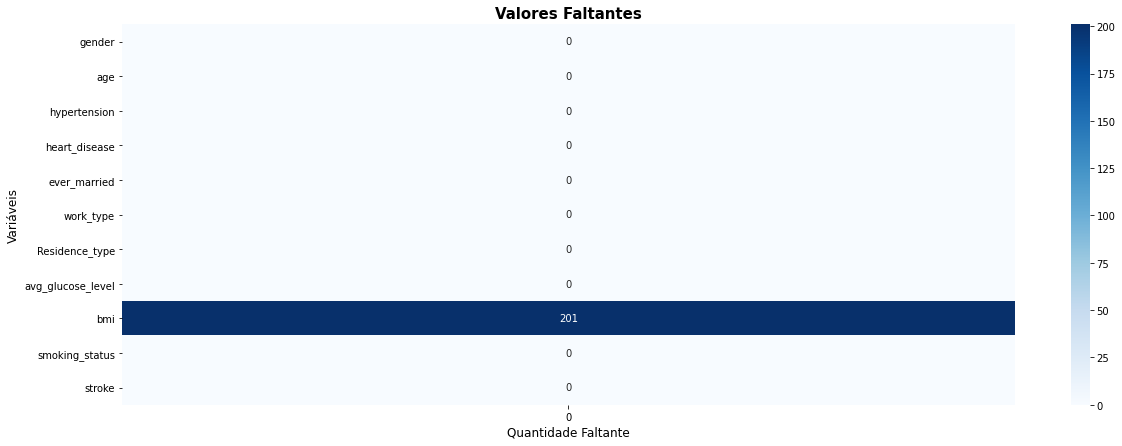

In [349]:
plt.figure(figsize=(20,7))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Blues')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

#<font color=cian size=5 face="cursive">Tratando os Dados

In [350]:
print("Preenchendo valores faltantes de 'bmi' com a média dos valores")
df.bmi = df.bmi.fillna(df.bmi.mean())
df[df.isnull()==True].count().sum()

Preenchendo valores faltantes de 'bmi' com a média dos valores


0

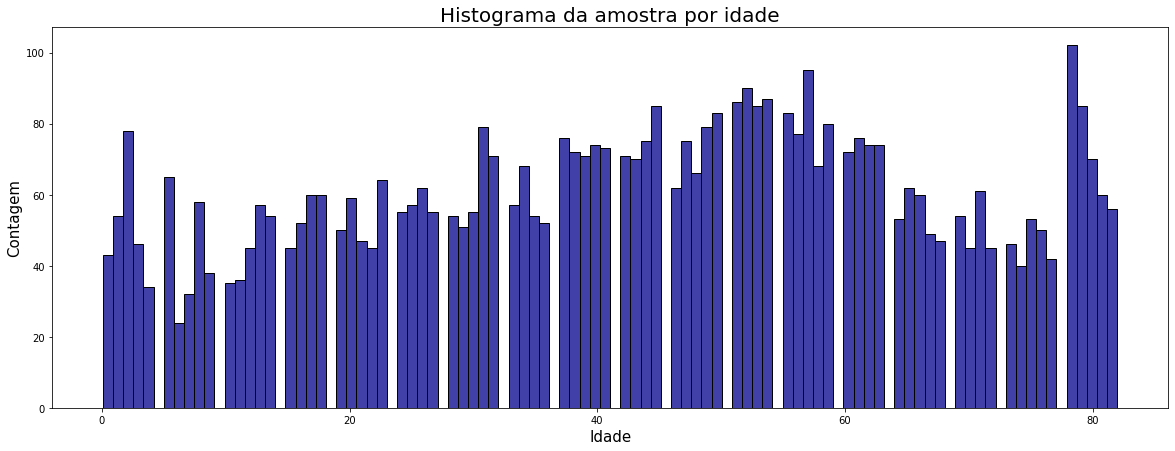

In [351]:
plt.figure(figsize=(20,7))
ax=sns.histplot(df.age,color='darkblue', bins=100)
ax.set_title("Histograma da amostra por idade", fontsize=20)
ax.set_xlabel("Idade", fontsize=15)
ax.set_ylabel("Contagem", fontsize=15);

Classes de idade para análise:

    ► A: 0  - 20 anos
    ► B: 21 - 35 anos
    ► C: 36 - 50 anos
    ► D: 51 - 65 anos
    ► E: 66 - 82 anos

In [352]:
classes = [0, 20, 35, 50, 65, 82]
labels = ["00-20","21-35","36-50","51-65","66-82"]

df["Age_Class"] = pd.cut(x = df.age,bins = classes,labels = labels,include_lowest = True).astype('object')

def transforma (data,i):
  data[i] = data[i].map({1:"Yes", 0:"No"})

for j in df.columns:
  if np.dtype(df[j]) == 'int64':
    transforma(df,j)

In [353]:
print("Valores únicos:\n")
for field in df.columns:
    if np.dtype(df[field]) == 'object':
        print("{} --> {}\n".format(field,df[field].unique()))
df.nunique().to_frame().T

Valores únicos:

gender --> ['Male' 'Female' 'Other']

hypertension --> ['No' 'Yes']

heart_disease --> ['Yes' 'No']

ever_married --> ['Yes' 'No']

work_type --> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type --> ['Urban' 'Rural']

smoking_status --> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke --> ['Yes' 'No']

Age_Class --> ['66-82' '51-65' '36-50' '00-20' '21-35']



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Class
0,3,104,2,2,2,5,2,3979,419,4,2,5


<font color=darkblue size=4>Relação das variáveis com <b>derrame</b>:


<b></b>1. Variáveis com e sem rerrame:

In [354]:
print("Porcentagem com relação a derrame:")
for i in df.columns:
  if np.dtype(df[i]) == 'object':
    print("\n")
    display(round(pd.crosstab(df.stroke, df[i], normalize=True),4)*100)

Porcentagem com relação a derrame:




gender,Female,Male,Other
stroke,,,
No,55.83,39.28,0.02
Yes,2.76,2.11,0.00


hypertension,No,Yes
stroke,,
No,86.67,8.45
Yes,3.58,1.29


heart_disease,No,Yes
stroke,,
No,90.65,4.48
Yes,3.95,0.92


ever_married,No,Yes
stroke,,
No,33.82,61.31
Yes,0.57,4.31


work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
No,12.21,0.43,54.32,14.76,13.41
Yes,0.65,0.00,2.92,1.27,0.04


Residence_type,Rural,Urban
stroke,,
No,46.97,48.16
Yes,2.23,2.64


smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
No,29.30,15.95,35.26,14.62
Yes,0.92,1.37,1.76,0.82


stroke,No,Yes
stroke,,
No,95.13,0.00
Yes,0.00,4.87


Age_Class,00-20,21-35,36-50,51-65,66-82
stroke,,,,,
No,20.02,17.08,20.82,21.37,15.83
Yes,0.04,0.02,0.39,1.37,3.05


<b></b>2. Variáveis com derrame

In [355]:
for i in df.columns:
  if np.dtype(df[i]) == 'object':
    print("\n")
    display(100*df[df.stroke=="Yes"][i].value_counts(normalize=True).to_frame().round(3))

,gender
Female,56.6
Male,43.4


,hypertension
No,73.5
Yes,26.5


,heart_disease
No,81.1
Yes,18.9


,ever_married
Yes,88.4
No,11.6


,work_type
Private,59.8
Self-employed,26.1
Govt_job,13.3
children,0.8


,Residence_type
Urban,54.2
Rural,45.8


,smoking_status
never smoked,36.1
formerly smoked,28.1
Unknown,18.9
smokes,16.9


,stroke
Yes,100.0


,Age_Class
66-82,62.7
51-65,28.1
36-50,8.0
00-20,0.8
21-35,0.4


<font size=4 color=darkblue>Trabalhando com os valores floats

In [356]:
print("Porcentagem com relação a derrame:")
for i in df.columns:
  if np.dtype(df[df.stroke=="Yes"][i]) == 'float':
    print("\n")
    display(round(pd.crosstab(df[df.stroke=="Yes"].stroke, df[df.stroke=="Yes"][i], normalize=True),4)*100)

Porcentagem com relação a derrame:




age,1.32,14.00,32.00,38.00,39.00,42.00,43.00,45.00,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,56.00,57.00,58.00,59.00,60.00,61.00,63.00,64.00,65.00,66.00,67.00,68.00,69.00,70.00,71.00,72.00,73.00,74.00,75.00,76.00,77.00,78.00,79.00,80.00,81.00,82.00
stroke,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yes,0.4,0.4,0.4,0.8,1.2,0.4,0.4,1.2,0.4,0.4,0.8,1.2,1.2,1.61,0.8,0.8,2.41,0.8,1.2,4.42,2.81,3.21,1.61,2.41,3.61,1.2,1.2,1.61,1.2,3.61,2.41,2.41,2.81,2.41,1.61,3.61,2.41,4.02,3.21,8.43,6.83,6.83,5.62,3.61


avg_glucose_level,56.11,57.92,57.93,58.09,58.57,59.32,59.35,59.86,60.67,60.91,60.94,60.98,61.94,62.48,62.55,62.57,64.14,64.17,64.44,66.03,66.72,67.29,67.41,68.02,68.43,68.53,68.56,70.09,70.28,70.30,70.37,70.94,71.20,71.22,72.17,72.67,72.73,72.81,72.96,73.18,...,213.03,213.22,214.09,215.94,216.58,216.94,217.08,218.46,219.72,219.73,219.84,219.91,221.29,221.58,221.79,221.89,223.83,224.10,226.98,228.56,228.69,228.70,231.56,231.61,233.29,233.94,235.63,237.75,239.07,240.09,240.59,242.52,243.58,247.51,249.31,250.89,252.72,259.63,263.32,271.74
stroke,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yes,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4


bmi,16.9,19.4,19.6,20.1,20.2,20.3,20.5,21.2,21.5,21.7,21.8,22.2,22.3,22.4,22.6,22.8,22.9,23.1,23.4,23.5,23.6,23.8,23.9,24.0,24.1,24.2,24.4,24.6,25.0,25.3,25.4,25.5,25.6,25.8,26.1,26.2,26.3,26.4,26.5,26.6,...,34.4,34.5,34.6,34.9,35.4,35.5,35.8,35.9,36.5,36.6,36.7,36.8,36.9,37.1,37.3,37.4,37.5,37.8,38.6,38.7,39.2,39.3,40.0,40.4,40.5,41.1,41.5,42.2,42.4,42.5,44.1,44.2,45.0,45.5,45.7,45.9,46.0,47.5,48.9,56.6
stroke,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yes,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.8,0.4,0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.8,1.61,0.4,1.2,0.4,0.4,0.8,0.4,0.4,0.4,0.8,0.8,0.8,0.4,0.8,1.2,0.4,1.2,...,0.8,0.8,0.4,0.4,0.4,0.4,0.8,0.4,1.2,0.4,0.4,0.8,0.4,0.4,0.4,0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4


No handles with labels found to put in legend.


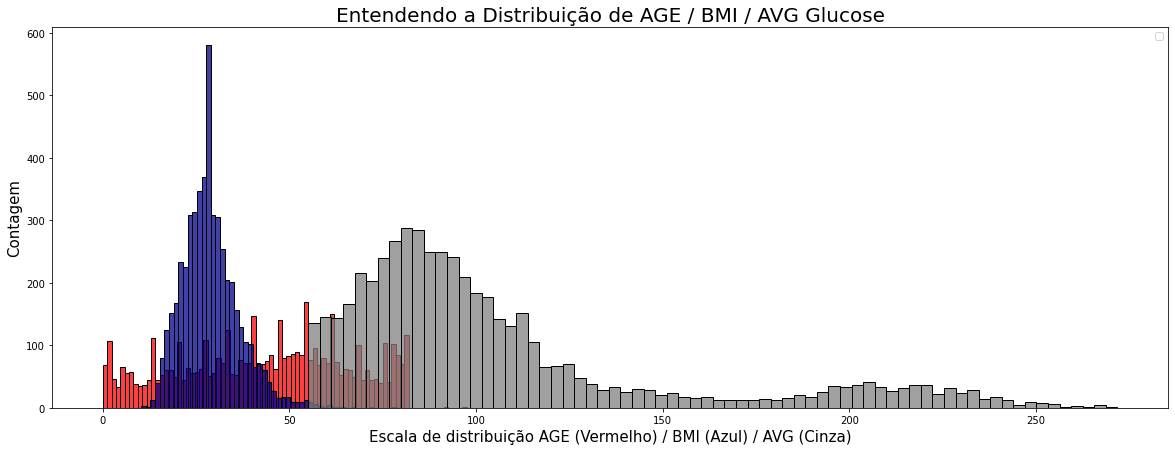

In [357]:
plt.figure(figsize=(20,7))
ax=sns.histplot(df.age, color='red', bins=70)
ax=sns.histplot(df.bmi, color='darkblue', bins=70)
ax=sns.histplot(df.avg_glucose_level, color='gray', bins=70)
ax.set_title("Entendendo a Distribuição de AGE / BMI / AVG Glucose", fontsize=20)
ax.set_xlabel("Escala de distribuição AGE (Vermelho) / BMI (Azul) / AVG (Cinza)", fontsize=15)
ax.set_ylabel("Contagem", fontsize=15);
ax.legend();

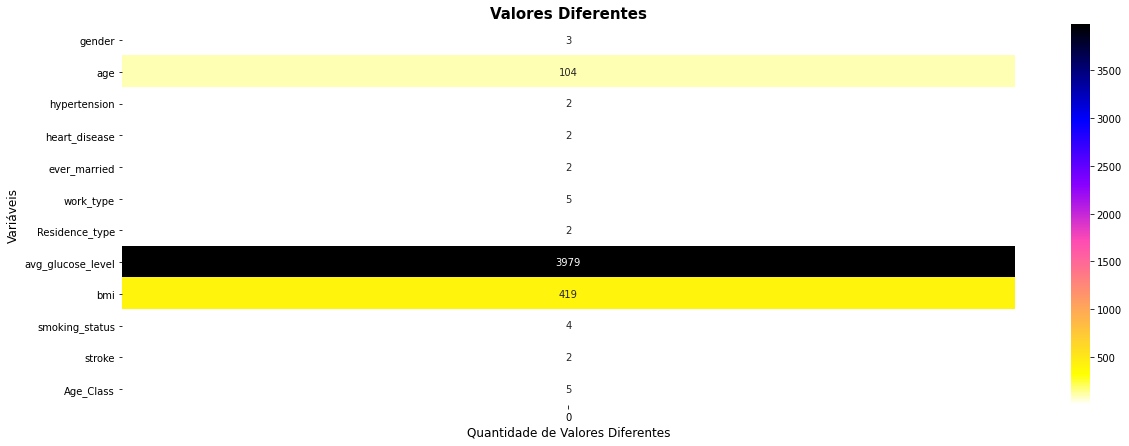

In [358]:
plt.figure(figsize=(20,7))
plt.title('Valores Diferentes',fontweight='bold', fontsize=15)
ax = sns.heatmap(df.nunique().to_frame(),annot=True,fmt='d',cmap='gnuplot2_r')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade de Valores Diferentes', fontsize=12)
plt.show()

<font color=green size=4>Utilizando uma ferramenta do Google para filtro de dados

In [359]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Class
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes,66-82
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes,51-65
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes,66-82
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes,36-50
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes,66-82
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,No,Yes,Private,Urban,83.75,28.893237,never smoked,No,66-82
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.000000,never smoked,No,66-82
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.600000,never smoked,No,21-35
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.600000,formerly smoked,No,51-65


#<font color=cian size=5 face=cursive>Análise dos dados

<font color=darkgreen size=4 face=cursive>Quais variáveis estão mais relacionadas com derrames cerebrais?

<font color= gray size=4 face=cursive>

*   Há cinco variáveis que mais chamam a atenção, as quais mostram uma corelação com a variável derrame, são elas:
  - age;
  - heart_disease;
  - avg_glucose_level;
  - hypertension;
  - ever_married.


In [360]:
df_trat = df[["stroke","age","heart_disease","avg_glucose_level","hypertension","ever_married"]]
for i in df_trat.columns:
  if np.dtype(df_trat[i]) == 'object':  df_trat[i] = df_trat[i].map({"Yes":1, "No":0})
print("Correlação linear entre as 5 variáveis mais relevantes:"), display(df_trat.corr()[:1]), print("\n\nMedidas Descritivas:")

display(df_trat.describe())

Correlação linear entre as 5 variáveis mais relevantes:


,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
stroke,1.0,0.245257,0.134914,0.131945,0.127904,0.10834




Medidas Descritivas:


,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.048728,43.226614,0.054012,106.147677,0.097456,0.656164
std,0.215320,22.612647,0.226063,45.283560,0.296607,0.475034
min,0.000000,0.080000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,77.245000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,91.885000,0.000000,1.000000
75%,0.000000,61.000000,0.000000,114.090000,0.000000,1.000000
max,1.000000,82.000000,1.000000,271.740000,1.000000,1.000000


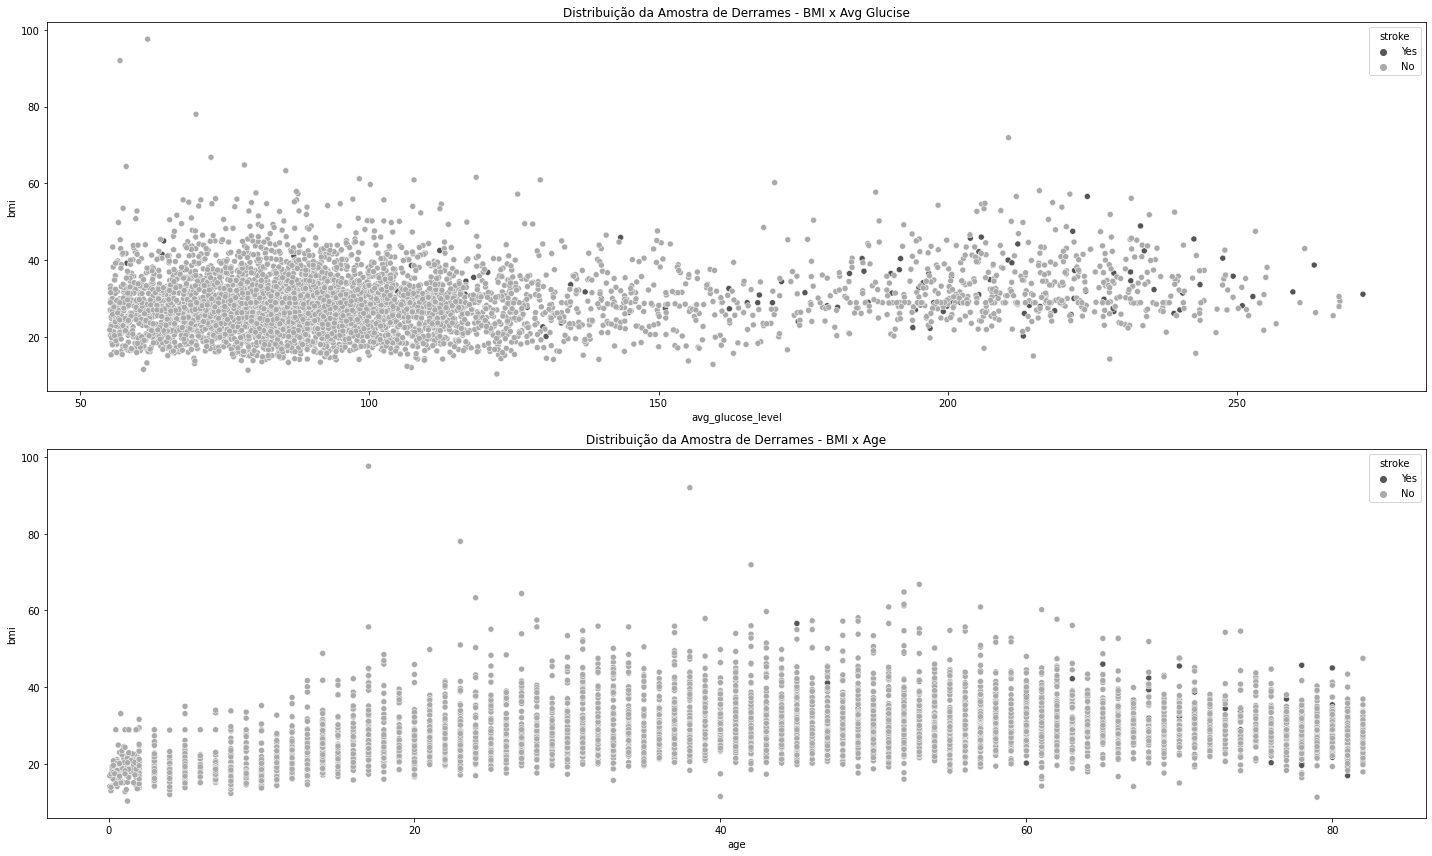

In [361]:
plt.subplots(figsize=(20,12))
plt.subplot(2,1,1)
plt.title('Distribuição da Amostra de Derrames - BMI x Avg Glucise')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'], palette='gray')
plt.subplot(2,1,2)
plt.title('Distribuição da Amostra de Derrames - BMI x Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'], palette='gray')
plt.tight_layout()
plt.show()

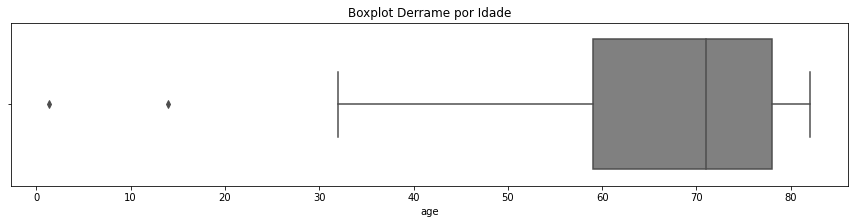

In [362]:
plt.figure(figsize=(15,3))
ax = sns.boxplot(df[df.stroke=="Yes"].age, color='gray')
ax.set_title("Boxplot Derrame por Idade");

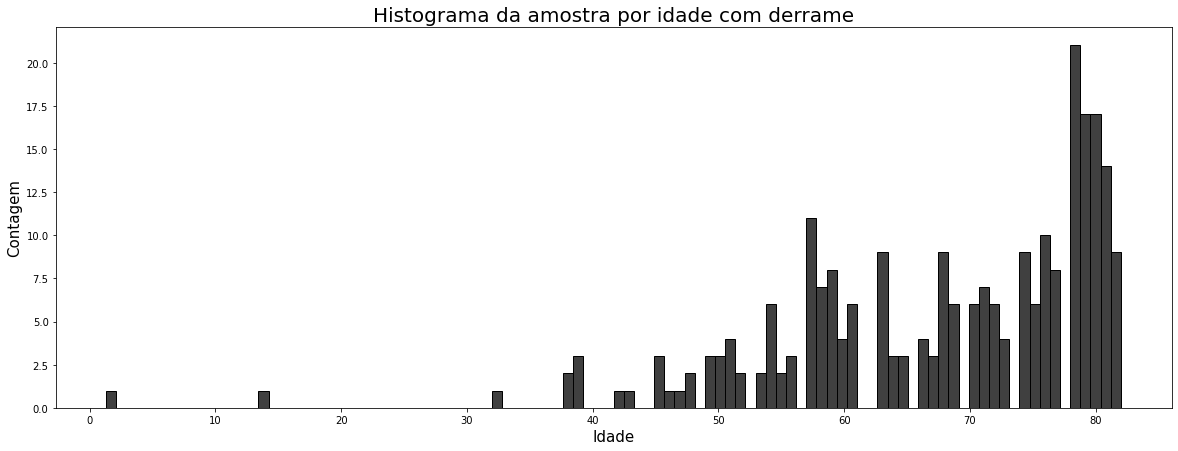

In [363]:
plt.figure(figsize=(20,7))
ax=sns.histplot(df[df.stroke=="Yes"].age, color='black', bins=100)
ax.set_title("Histograma da amostra por idade com derrame", fontsize=20)
ax.set_xlabel("Idade", fontsize=15)
ax.set_ylabel("Contagem", fontsize=15);

Da amostra, tomando somente aquelas pessoas que já sofreram derrame em algum momento da vida, temos:
- Pessoas com idade superior a 59 anos que tiveram derrame é três vezes o número de pessoas com idade abaixo de 59 anos.

Text(0, 0.5, 'Sexo')

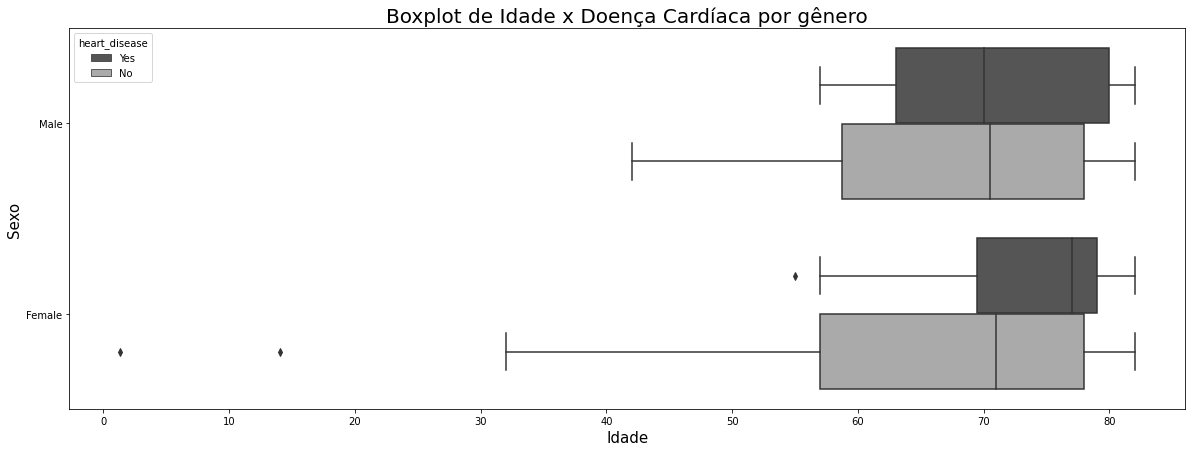

In [364]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(x='age', y='gender',data=df[df.stroke=="Yes"], orient='h', hue='heart_disease', palette='gray')
ax.set_title("Boxplot de Idade x Doença Cardíaca por gênero", fontsize=20)
ax.set_xlabel("Idade", fontsize=15)
ax.set_ylabel("Sexo", fontsize=15)

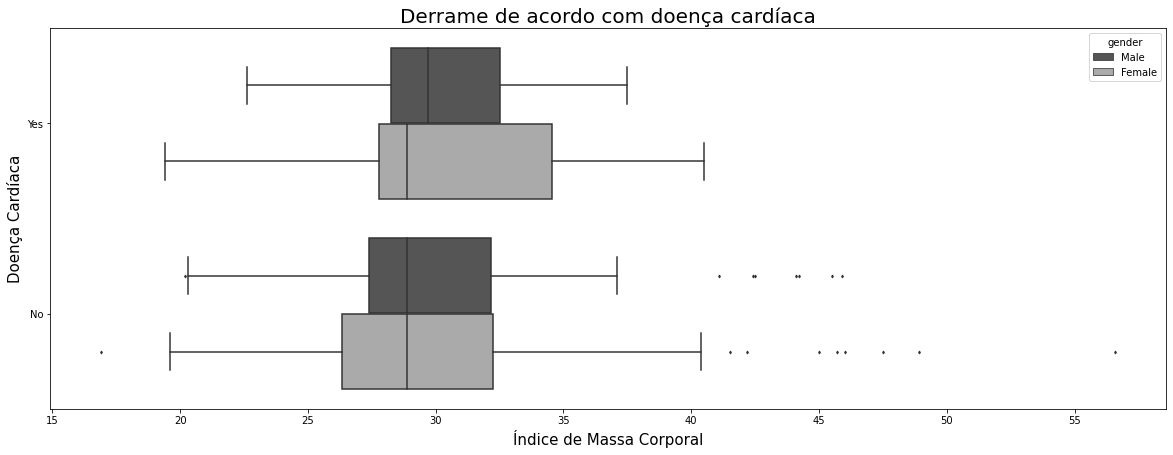

In [365]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(x='bmi', y='heart_disease',data=df[df.stroke=="Yes"], orient='h', hue='gender', palette='gray',fliersize=2)
ax.set_title("Derrame de acordo com doença cardíaca", fontsize=20)
ax.set_xlabel("Índice de Massa Corporal", fontsize=15)
ax.set_ylabel("Doença Cardíaca", fontsize=15);

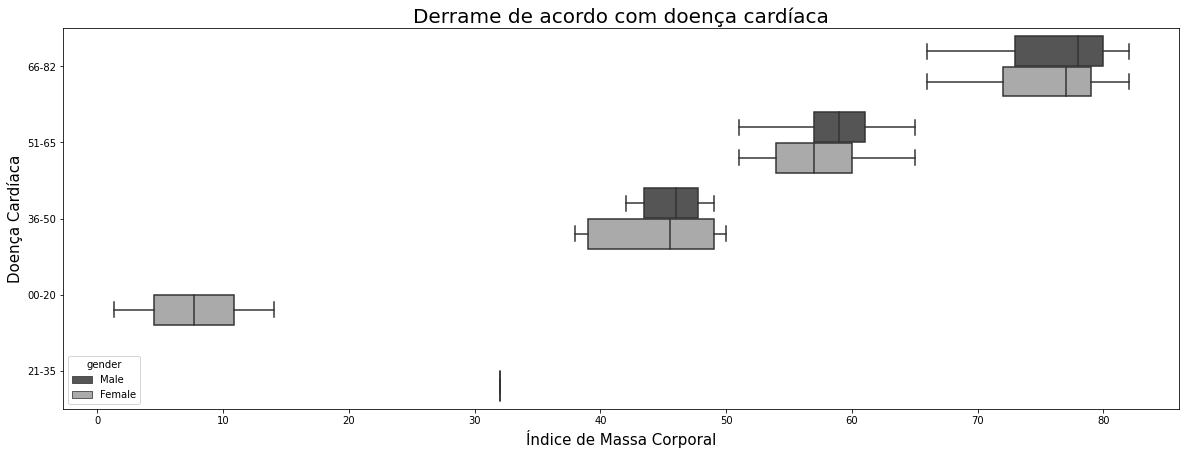

In [366]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(x='age', y='Age_Class',data=df[df.stroke=="Yes"], orient='h', hue='gender', palette='gray',fliersize=2)
ax.set_title("Derrame de acordo com doença cardíaca", fontsize=20)
ax.set_xlabel("Índice de Massa Corporal", fontsize=15)
ax.set_ylabel("Doença Cardíaca", fontsize=15);

### Histograma de pessoas entrevistadas que sofreram derrame

In [367]:
df[df.stroke=="Yes"].groupby(["gender","Age_Class"])[["gender"]].count()

gender
gender Age_Class        
Female 00-20           2
       21-35           1
       36-50          14
       51-65          33
       66-82          91
Male   36-50           6
       51-65          37
       66-82          65